In [1]:
import seaborn as sns

In [2]:
# list all jpg files in the "C:\Users\robert\OneDrive\MSc\p3.1 - cognitive science\project\repo\stimuli" directory
import os
import glob
from pathlib import Path
jpg_files = glob.glob('C:/Users/robert/OneDrive/MSc/p3.1 - cognitive science/project/repo/stimuli/*.jpg')
l = [Path(f).parts[-1]+'\n' for f in jpg_files]

with open('files.txt', 'w') as f:
    f.writelines(sorted(l))

In [2]:
import pandas as pd

# Load the dataset
#file_path = 'synthetic_enriched_gt.csv'
file_path = './data/jatos.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2940 non-null   int64 
 1   response_side    2940 non-null   object
 2   impaired_vision  2940 non-null   object
 3   experience       2940 non-null   object
 4   gender           2940 non-null   object
 5   session_id       2940 non-null   int64 
 6   inner_width      2940 non-null   int64 
 7   trial_no         2940 non-null   int64 
 8   filename         2940 non-null   object
 9   scene_id         2940 non-null   int64 
 10  red_count        2940 non-null   int64 
 11  blue_count       2940 non-null   int64 
 12  version          2940 non-null   int64 
 13  response_time    2940 non-null   int64 
 14  expected_side    2940 non-null   object
 15  browser          2940 non-null   object
 16  screen_w         2940 non-null   int64 
 17  screen_h         2940 non-null   

,age,response_side,impaired_vision,experience,gender,session_id,inner_width,trial_no,filename,scene_id,...,expected_side,browser,screen_w,screen_h,os,exp_start_date,exp_start_time,favorite_team,favorite_color,subject_id
0,23,red,no,never,female,1697797568418,1512,0,id17_v1_b6_r5.jpg,17,...,blue,Netscape,1512,982,MacIntel,20-09-23,12:26:00,other,other,444707
1,23,blue,no,never,female,1697797568418,1512,1,id10_v2_b7_r6.jpg,10,...,blue,Netscape,1512,982,MacIntel,20-09-23,12:26:00,other,other,444707
2,23,blue,no,never,female,1697797568418,1512,2,id12_v1_b7_r6.jpg,12,...,blue,Netscape,1512,982,MacIntel,20-09-23,12:26:00,other,other,444707
3,23,blue,no,never,female,1697797568418,1512,3,id20_v1_b7_r6.jpg,20,...,blue,Netscape,1512,982,MacIntel,20-09-23,12:26:00,other,other,444707
4,23,red,no,never,female,1697797568418,1512,4,id5_v2_b7_r6.jpg,5,...,blue,Netscape,1512,982,MacIntel,20-09-23,12:26:00,other,other,444707


In [3]:
# Descriptive statistics for numerical variables
desc_stats = data[['age', 'response_time', 'red_count', 'blue_count']].describe()

desc_stats

,age,response_time,red_count,blue_count
count,2940.000000,2940.000000,2940.000000,2940.000000
mean,31.142857,1426.123469,6.216667,6.216667
std,21.577464,5618.929138,0.754928,0.754928
min,19.000000,178.000000,5.000000,5.000000
25%,23.000000,698.750000,6.000000,6.000000
50%,26.000000,934.000000,6.000000,6.000000
75%,31.000000,1383.000000,7.000000,7.000000
max,169.000000,220947.000000,8.000000,8.000000


In [4]:
# Creating a new column 'is_correct' that is True when response_side equals expected_side and False otherwise
data['is_correct'] = (data['response_side'] == data['expected_side']).astype(float)

# Outlier removal

In [6]:
# we don't want phones
data.groupby('os').session_id.count()//60

os
Linux aarch64     2
Linux armv81      1
Linux armv8l      1
Linux x86_64      3
MacIntel         15
Win32            27
Name: session_id, dtype: int64

In [7]:
data.query('inner_width < 750').groupby('os').count() / 60
# We conclude that anything with a small inner width can be considered a phone so the only valid OS-es are "Linux x86_64", "MacIntel", "Win32"

,age,response_side,impaired_vision,experience,gender,session_id,inner_width,trial_no,filename,scene_id,...,expected_side,browser,screen_w,screen_h,exp_start_date,exp_start_time,favorite_team,favorite_color,subject_id,is_correct
os,,,,,,,,,,,,,,,,,,,,,
Linux aarch64,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Linux armv81,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Linux armv8l,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Removing phone based experiments (4 in total)

In [11]:
n_of_experiments = len(data.groupby('session_id'))
print(f'There are {n_of_experiments} experiments in the dataset')

There are 49 experiments in the dataset


In [14]:
data_filtered = data.query('inner_width > 750')
len(data_filtered) / 60

45.0

## Removing unusual response times

number of outliying trials 20
number of trials removed 40


<Axes: xlabel='response_time', ylabel='Count'>

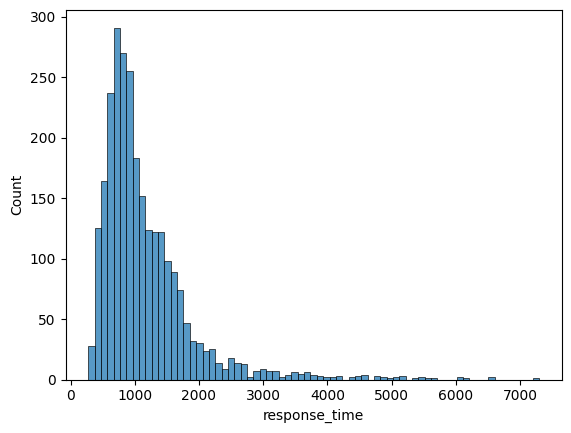

In [15]:
# calculate the 99th percentile of the response_time
response_time_99th = data_filtered['response_time'].quantile(0.99)
response_time_99th  # 5219 ms

response_time_01th = data_filtered['response_time'].quantile(0.01)
response_time_01th

# Let's set the threshold to 10 second
rt_cutoff_hi = response_time_99th * 1.5
rt_cutoff_lo = response_time_01th / 1.5 

rt_cutoff_lo, rt_cutoff_hi

# We want to remove trials where the response_time is outside the cutoff values
# However, because the data is paired (the same scene in two versions) if any of the scene versions is an outlier we also remove the other.
# This way we keep the dataset paired.

# create a dataframe with the subject_id and scene_id of the trials that have a response_time outside the cutoff values
to_remove = data_filtered.query(f'(response_time < {rt_cutoff_lo}) or (response_time > {rt_cutoff_hi})').groupby(['subject_id', 'scene_id']).count()[[]]
print(f'number of outliying trials {len(to_remove)}')

loc_to_remove = ~data_filtered.set_index(['subject_id', 'scene_id']).index.isin(to_remove.index)
print(f'number of trials removed {sum(~loc_to_remove)}')

# remove items from data_filtered where the subject_id and scene_id, match one entry in to_remove
data_filtered = data_filtered[loc_to_remove]

sns.histplot(data_filtered, x='response_time', kde=False, )  # looks better

In [16]:
# compare the above method with the IQR method
# compute lower and upper bounds for oulier removal using the IQR method
Q1 = data_filtered['response_time'].quantile(0.25)
Q3 = data_filtered['response_time'].quantile(0.75)
IQR = Q3 - Q1
rt_cutoff_lo = Q1 - 1.5 * IQR
rt_cutoff_hi = Q3 + 1.5 * IQR

rt_cutoff_lo, rt_cutoff_hi

(-334.75, 2443.25)

In [17]:
data_filtered.agg({'response_time':['mean', 'median', 'min', 'max']})

,response_time
mean,1163.008271
median,954.000000
min,275.000000
max,7298.000000


In [18]:
data_reduced = data_filtered.groupby('session_id').first()
data_reduced

,age,response_side,impaired_vision,experience,gender,inner_width,trial_no,filename,scene_id,red_count,...,browser,screen_w,screen_h,os,exp_start_date,exp_start_time,favorite_team,favorite_color,subject_id,is_correct
session_id,,,,,,,,,,,,,,,,,,,,,
1697622184937,38,blue,no,more,male,2419,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,2560,1440,Win32,18-09-23,11:42:55,red,other,442242,1.0
1697638495132,23,red,no,last-year,male,1512,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1512,982,MacIntel,18-09-23,16:13:24,other,other,442451,0.0
1697640242308,23,blue,no,last-year,male,1324,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1512,982,MacIntel,18-09-23,16:44:03,blue,blue,442482,1.0
1697640313337,22,blue,no,last-month,male,1440,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1440,900,MacIntel,18-09-23,16:44:09,blue,other,442483,1.0
1697650489533,32,blue,no,last-month,male,1920,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1920,1080,Win32,18-09-23,18:33:49,other,other,442636,1.0
1697652535387,29,blue,no,last-month,female,1280,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1920,1080,Win32,18-09-23,20:07:38,both,both,442691,1.0
1697654884469,28,blue,no,last-month,male,1232,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1280,800,Win32,18-09-23,20:47:34,other,blue,442752,1.0
1697736141378,30,blue,no,last-month,male,1470,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1470,956,MacIntel,19-09-23,19:21:26,blue,blue,443820,1.0
1697740029644,24,blue,no,more,male,1780,0,id17_v1_b6_r5.jpg,17,5,...,Netscape,1800,1169,MacIntel,19-09-23,20:26:19,other,blue,443927,1.0


In [19]:
#remove trials with age > 120 from data_filtered, data_reduced and data
data_filtered = data_filtered.query('age < 120')
data_reduced = data_reduced.query('age < 120')
#data = data.query('age < 120')

In [24]:

print(f"There are {len(data_filtered.groupby('session_id'))} experiments in the dataset")
# get session_id's of subjects that have less than 60 trials
session_ids = data_filtered.groupby('subject_id').count().query('scene_id < 60').index

# print the number of subjects that have less than 60 trials
print(f'number of subjects with less than 60 trials {len(session_ids)}')

# print the total number of trials
print(f'total number of trials {len(data_filtered)}')

There are 44 experiments in the dataset
number of subjects with less than 60 trials 11
total number of trials 2600


/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/2890394362.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data_reduced, ax=axes[1, 0], palette='viridis')
/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/2890394362.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience', data=data_reduced, ax=axes[1, 1], palette='coolwarm')


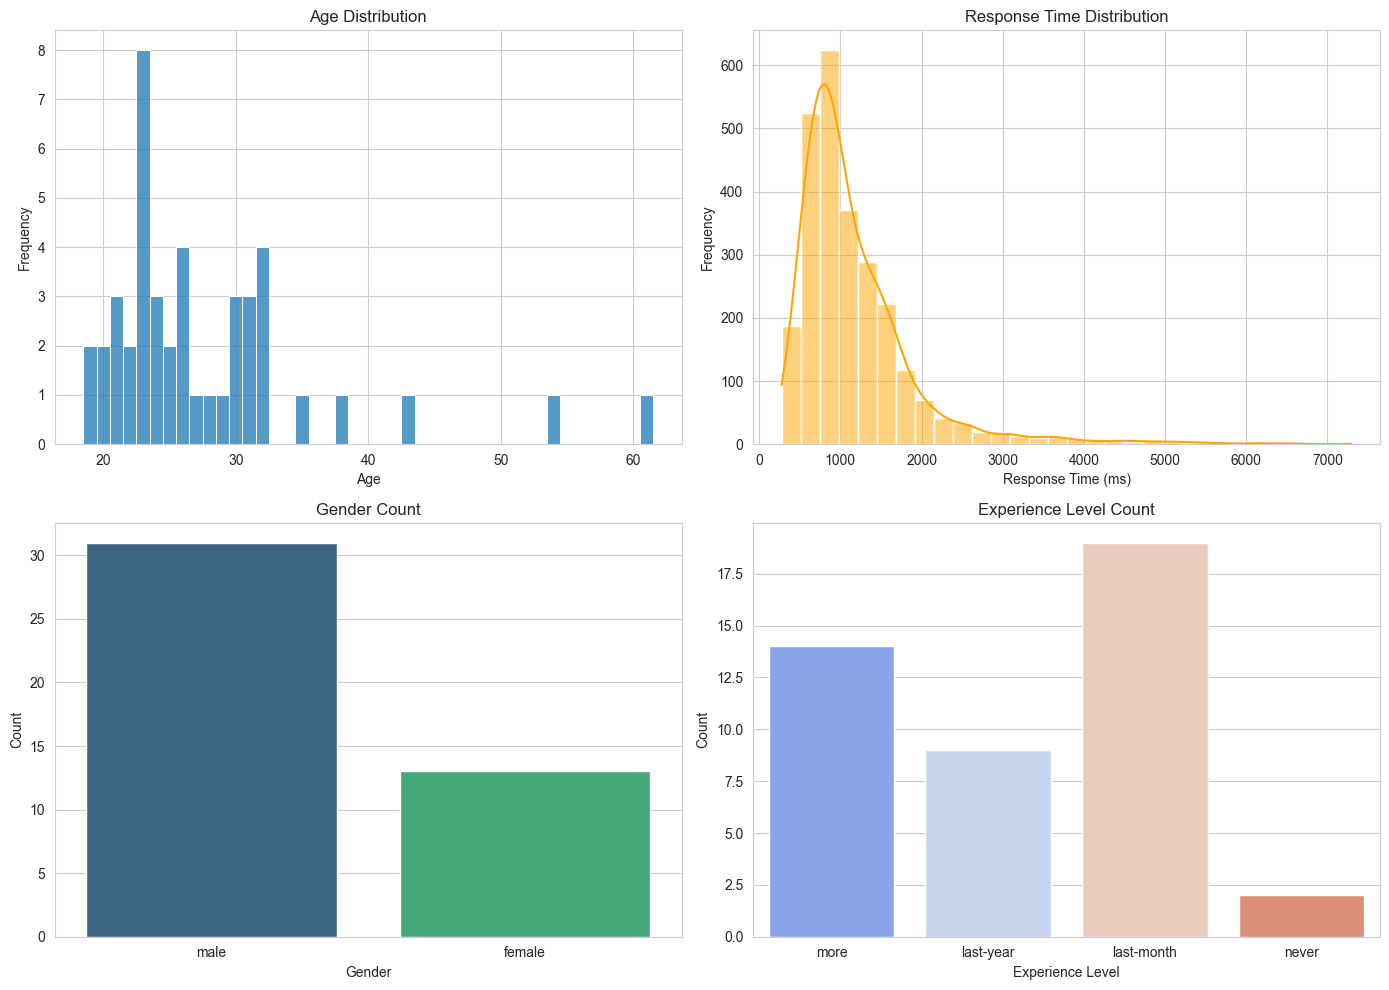

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the distribution of 'age'
sns.histplot(data_reduced['age'], bins=15, kde=False, ax=axes[0, 0], discrete=True)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of 'response_time'
sns.histplot(data_filtered['response_time'], bins=30, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Response Time Distribution')
axes[0, 1].set_xlabel('Response Time (ms)')
axes[0, 1].set_ylabel('Frequency')

# Count plot for 'gender'
sns.countplot(x='gender', data=data_reduced, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Gender Count')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Count plot for 'experience'
sns.countplot(x='experience', data=data_reduced, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Experience Level Count')
axes[1, 1].set_xlabel('Experience Level')
axes[1, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/4116036931.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='favorite_team', data=data_filtered, ax=axes[0, 0], palette=color_mappings)
/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/4116036931.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='favorite_color', data=data_filtered, ax=axes[0, 1], palette=color_mappings)
/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/4116036931.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplo

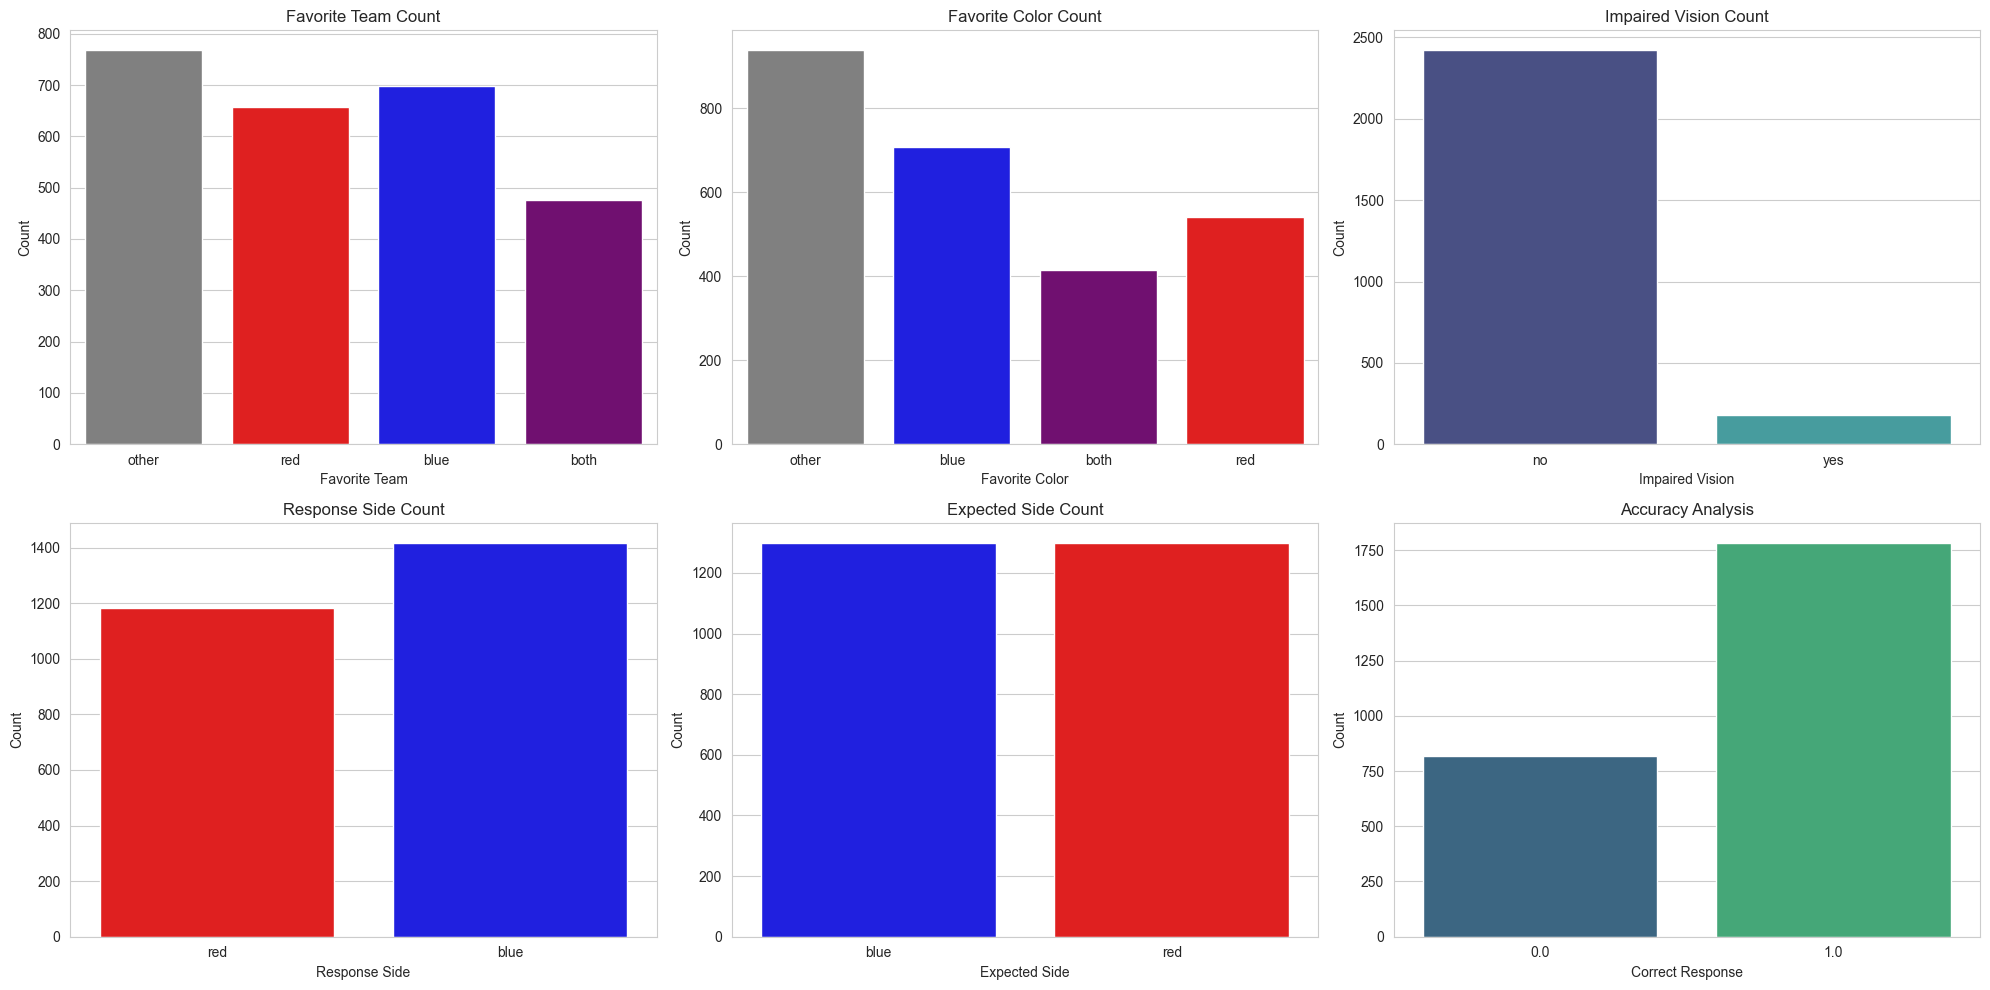

In [27]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Custom color mappings
color_mappings = {'blue': 'blue', 'red': 'red', 'other': 'grey', 'both': 'purple'}

# Count plot for 'favorite_team'
sns.countplot(x='favorite_team', data=data_filtered, ax=axes[0, 0], palette=color_mappings)
axes[0, 0].set_title('Favorite Team Count')
axes[0, 0].set_xlabel('Favorite Team')
axes[0, 0].set_ylabel('Count')

# Count plot for 'favorite_color'
sns.countplot(x='favorite_color', data=data_filtered, ax=axes[0, 1], palette=color_mappings)
axes[0, 1].set_title('Favorite Color Count')
axes[0, 1].set_xlabel('Favorite Color')
axes[0, 1].set_ylabel('Count')

# Count plot for 'impaired_vision'
sns.countplot(x='impaired_vision', data=data_filtered, ax=axes[0, 2], palette='mako')
axes[0, 2].set_title('Impaired Vision Count')
axes[0, 2].set_xlabel('Impaired Vision')
axes[0, 2].set_ylabel('Count')

# Count plot for 'response_side'
sns.countplot(x='response_side', data=data_filtered, ax=axes[1, 0], palette={'red': 'red', 'blue': 'blue'})
axes[1, 0].set_title('Response Side Count')
axes[1, 0].set_xlabel('Response Side')
axes[1, 0].set_ylabel('Count')

# Count plot for 'expected_side'
sns.countplot(x='expected_side', data=data_filtered, ax=axes[1, 1], palette={'red': 'red', 'blue': 'blue'})
axes[1, 1].set_title('Expected Side Count')
axes[1, 1].set_xlabel('Expected Side')
axes[1, 1].set_ylabel('Count')

# Accuracy analysis
sns.countplot(x='is_correct', data=data_filtered, ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Accuracy Analysis')
axes[1, 2].set_xlabel('Correct Response')
axes[1, 2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/1478996940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='favorite_team', data=data_reduced, ax=axes[0, 0], palette=color_mappings)
/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/1478996940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='favorite_color', data=data_reduced, ax=axes[0, 1], palette=color_mappings)
/var/folders/7w/76s_b2md6wzc7h8d44sz7xth0000gn/T/ipykernel_64497/1478996940.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(

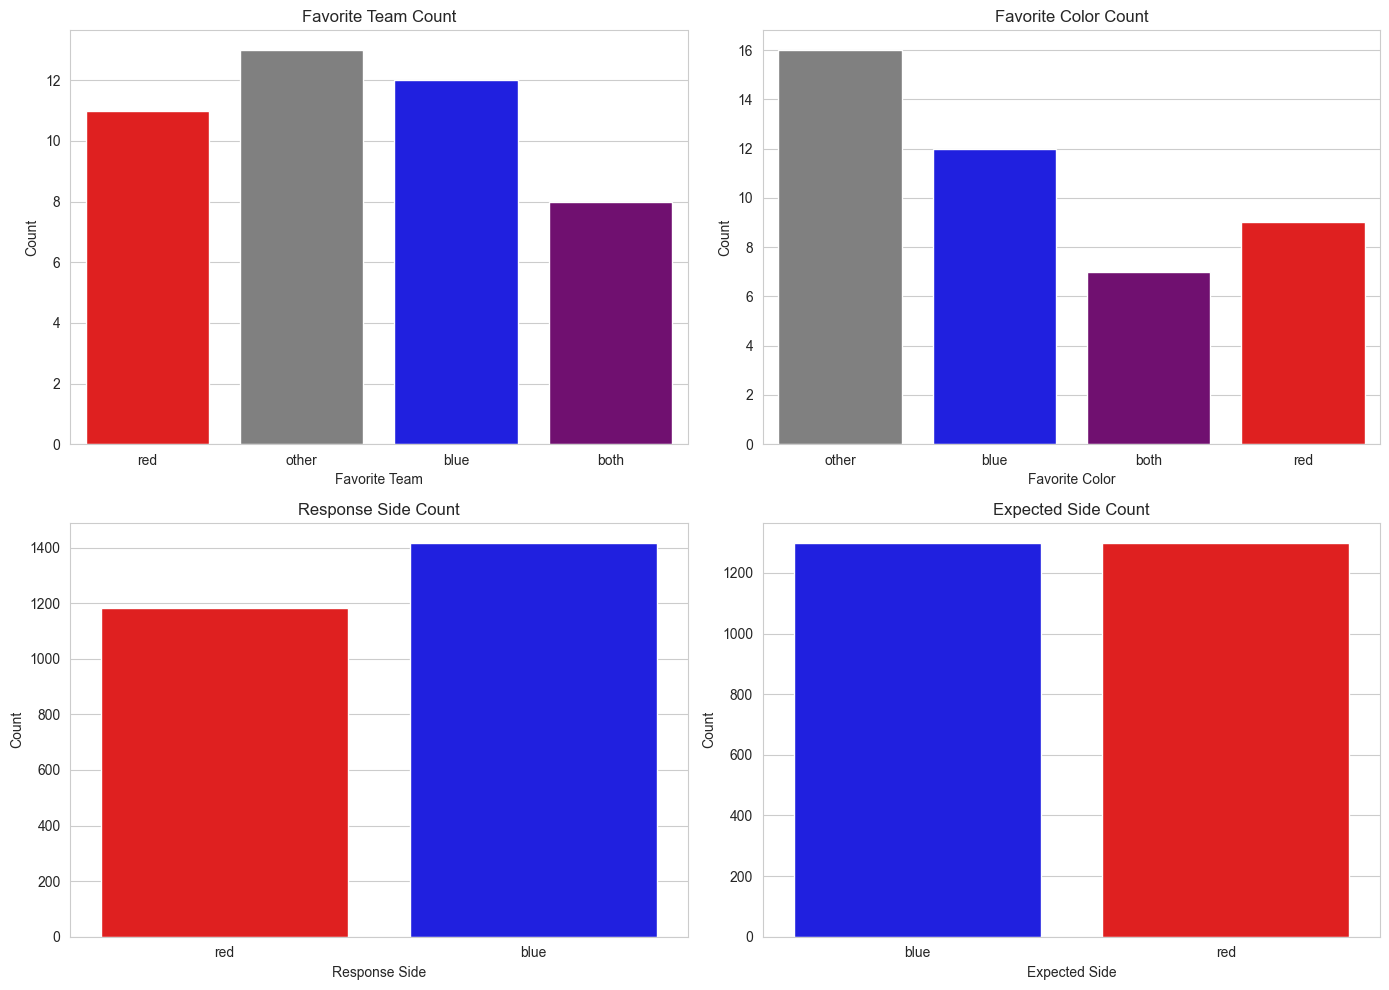

In [29]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Custom color mappings
color_mappings = {'blue': 'blue', 'red': 'red', 'other': 'grey', 'both': 'purple'}

# Count plot for 'favorite_team'
sns.countplot(x='favorite_team', data=data_reduced, ax=axes[0, 0], palette=color_mappings)
axes[0, 0].set_title('Favorite Team Count')
axes[0, 0].set_xlabel('Favorite Team')
axes[0, 0].set_ylabel('Count')

# Count plot for 'favorite_color'
sns.countplot(x='favorite_color', data=data_reduced, ax=axes[0, 1], palette=color_mappings)
axes[0, 1].set_title('Favorite Color Count')
axes[0, 1].set_xlabel('Favorite Color')
axes[0, 1].set_ylabel('Count')

# Count plot for 'response_side'
sns.countplot(x='response_side', data=data_filtered, ax=axes[1, 0], palette={'red': 'red', 'blue': 'blue'})
axes[1, 0].set_title('Response Side Count')
axes[1, 0].set_xlabel('Response Side')
axes[1, 0].set_ylabel('Count')

# Count plot for 'expected_side'
sns.countplot(x='expected_side', data=data_filtered, ax=axes[1, 1], palette={'red': 'red', 'blue': 'blue'})
axes[1, 1].set_title('Expected Side Count')
axes[1, 1].set_xlabel('Expected Side')
axes[1, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='is_correct', ylabel='Count'>

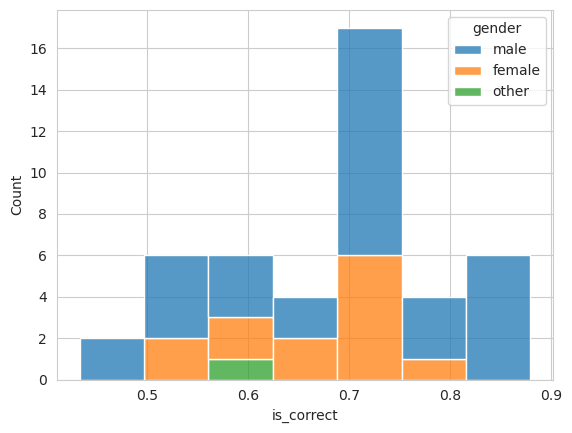

In [15]:
# histograms of accuracy
_df = data_filtered.groupby(['subject_id', 'gender']).is_correct.mean().reset_index()
sns.histplot(data=_df, x='is_correct', hue='gender', multiple='stack')

We'll explore how different factors influence accuracy by visualizing the proportion of correct responses across various categories. Specifically, we'll examine:

* Gender
* Experience Level
* Favorite Team
* Favorite Color

/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

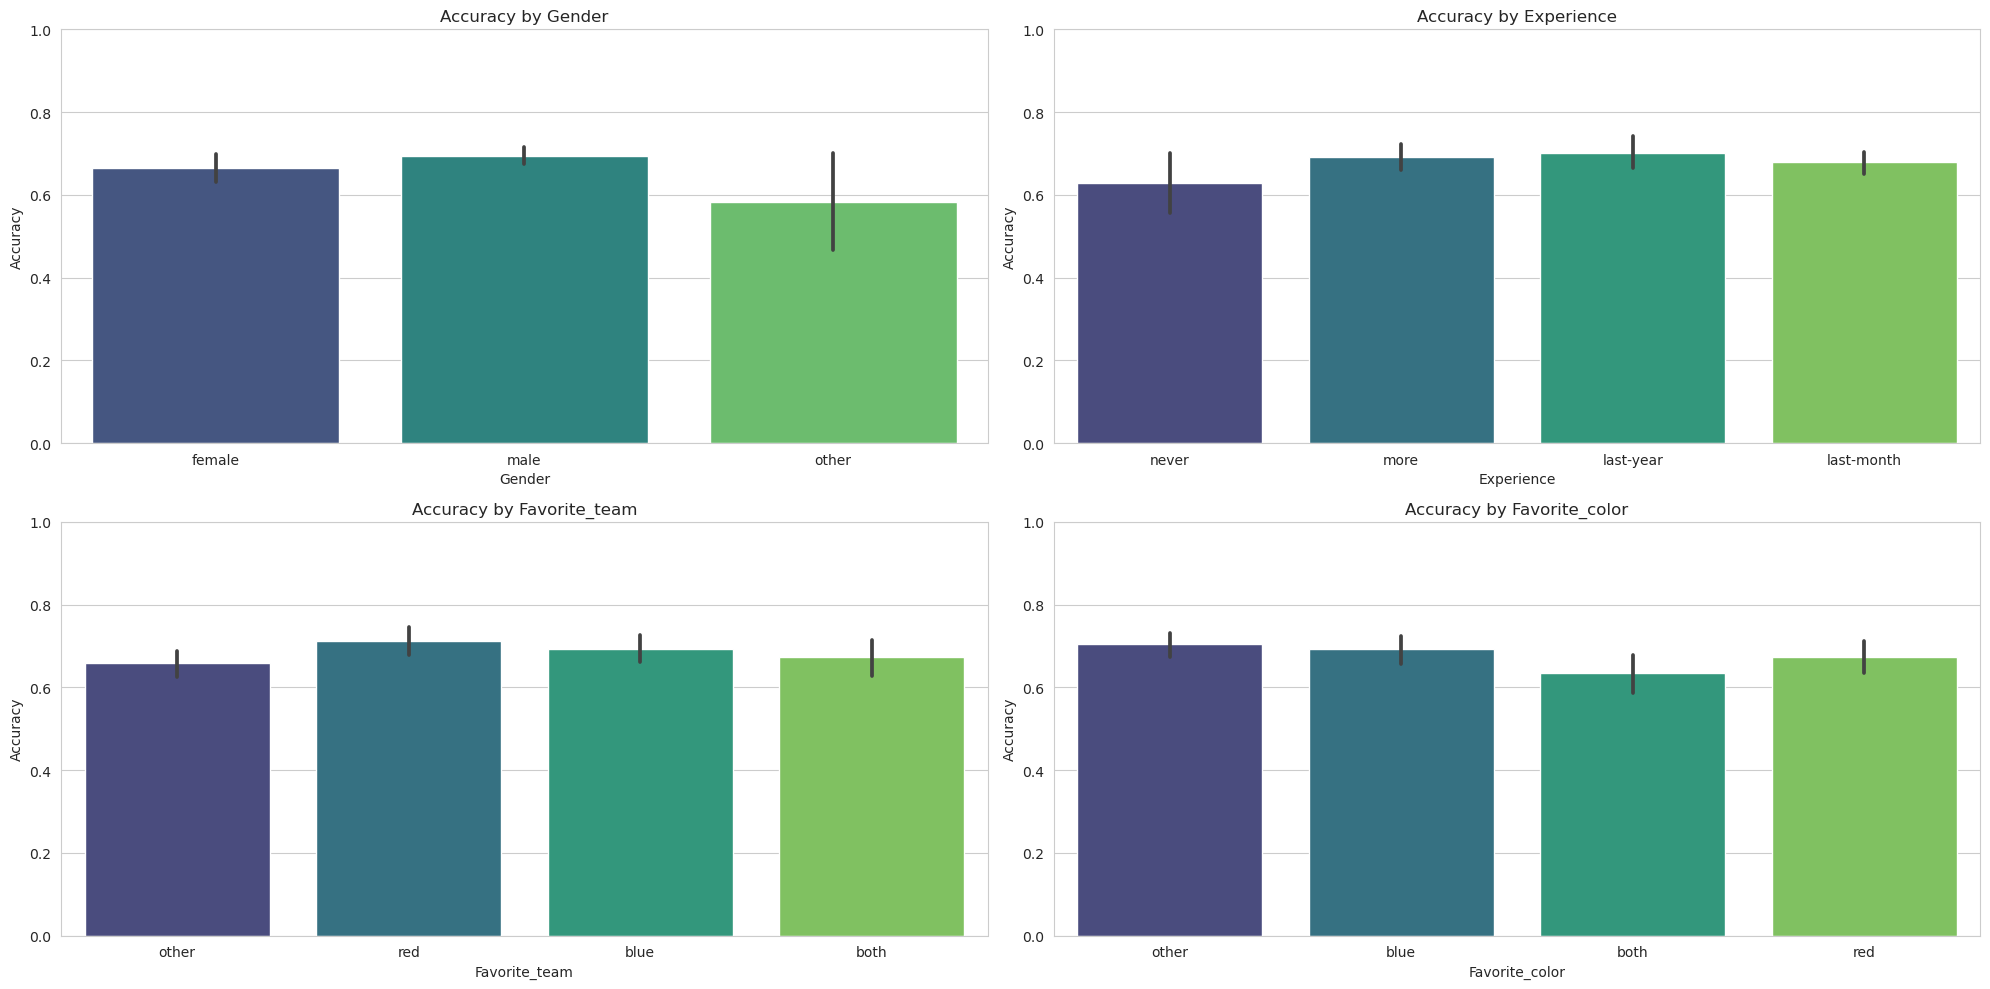

In [16]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# List of variables to plot
#variables_to_plot = ['gender', 'experience', 'favorite_team', 'favorite_color', 'impaired_vision']
variables_to_plot = ['gender', 'experience', 'favorite_team', 'favorite_color']

# Loop through the variables and create bar plots
for i, var in enumerate(variables_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x=var, y='is_correct', data=data_filtered, ax=ax, palette=color_mappings if var in color_mappings else 'viridis')
    ax.set_title(f'Accuracy by {var.capitalize()}')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1)  # as accuracy is a proportion, limit y-axis to 1

# Adjust the layout
plt.tight_layout()
plt.show()


/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

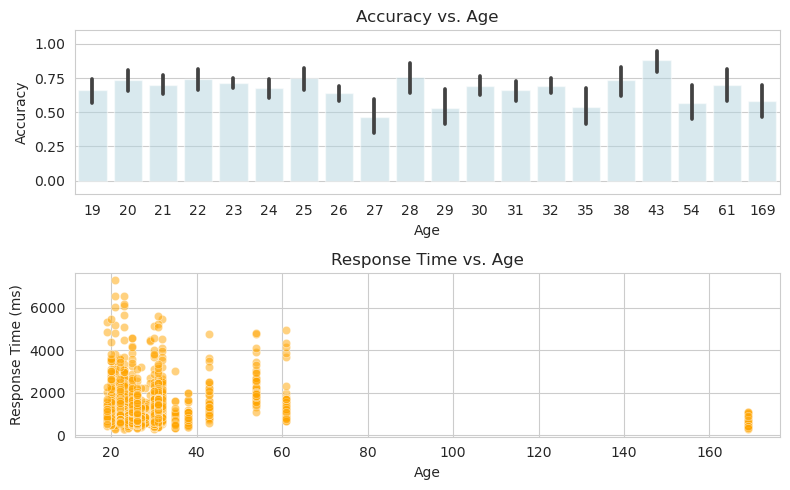

In [17]:
# Initialize a 1x2 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

data['age'] = data['age'].astype(int)
# Scatter plot for Accuracy vs. Age
sns.barplot(x='age', y='is_correct', data=data_filtered, ax=axes[0], color='lightblue', alpha=0.5)
axes[0].set_title('Accuracy vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1

# Scatter plot for Response Time vs. Age
sns.scatterplot(x='age', y='response_time', data=data_filtered, ax=axes[1], color='orange', alpha=0.5)
axes[1].set_title('Response Time vs. Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Response Time (ms)')

# Adjust the layout
plt.tight_layout()
plt.show()


/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

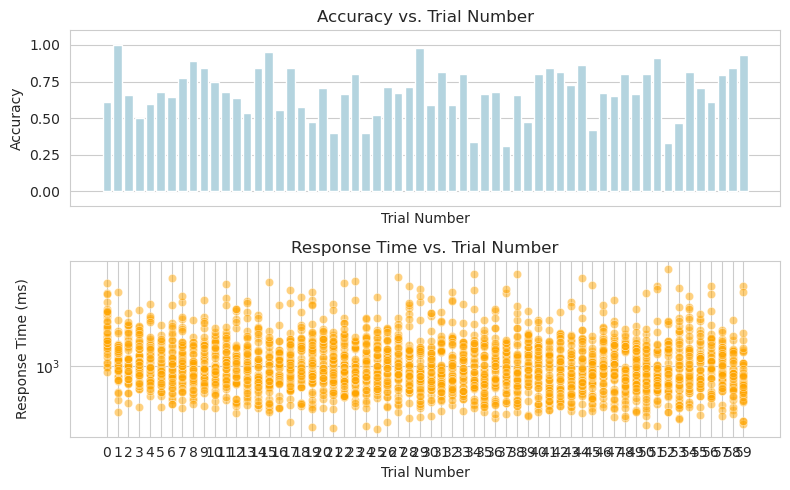

In [18]:
# Initialize a 1x2 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

# Box plot for Accuracy vs. Trial Number
sns.barplot(x='trial_no', y='is_correct', data=data_filtered, ax=axes[0], color='lightblue', errorbar=None)
axes[0].set_title('Accuracy vs. Trial Number')
axes[0].set_xlabel('Trial Number')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1

# Scatter plot for Response Time vs. Trial Number
sns.scatterplot(x='trial_no', y='response_time', data=data_filtered, ax=axes[1], color='orange', alpha=0.5)
plt.yscale('log')
axes[1].set_title('Response Time vs. Trial Number')
axes[1].set_xlabel('Trial Number')
axes[1].set_ylabel('Response Time (ms)')

# Adjust the layout
plt.tight_layout()
plt.show()


/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/robert/miniconda3/envs/cog_sci_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

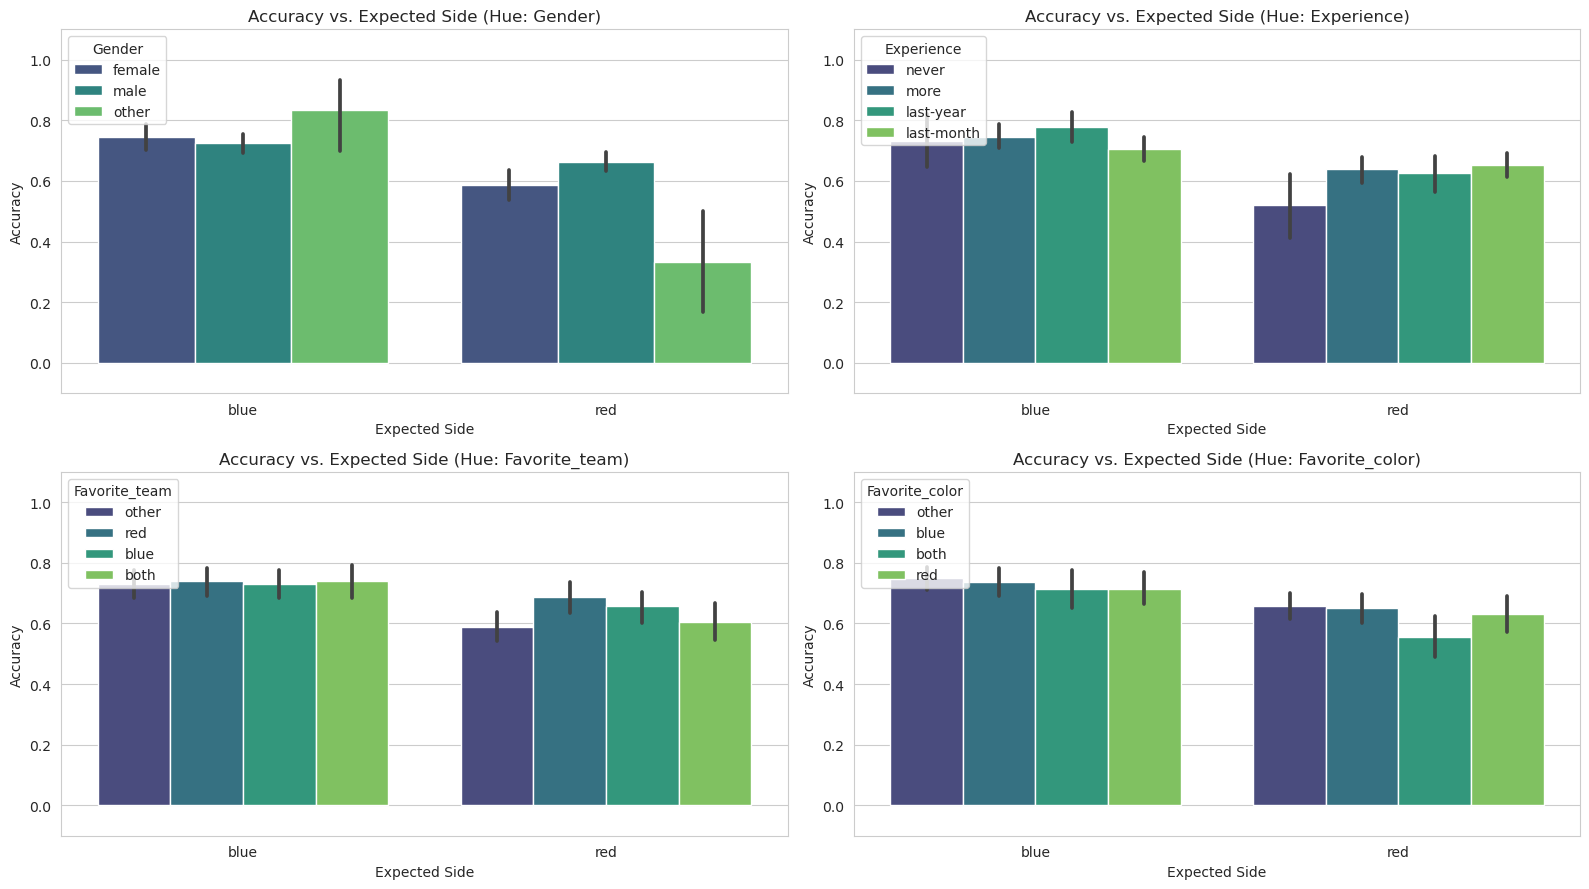

In [19]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Variables for hue
hue_variables = ['gender', 'experience', 'favorite_team', 'favorite_color']

# Loop through the hue variables and create box plots
for i, hue_var in enumerate(hue_variables):
    ax = axes[i//2, i%2]
    sns.barplot(x='expected_side', y='is_correct', hue=hue_var, data=data_filtered, ax=ax, palette='viridis')
    ax.set_title(f'Accuracy vs. Expected Side (Hue: {hue_var.capitalize()})')
    ax.set_xlabel('Expected Side')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1
    ax.legend(title=hue_var.capitalize(), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [20]:
data_filtered.to_csv('./data/jatos_filtered.csv')